In [1]:
# Read-in imdb data
import csv

movies = {}

with open('imdb_dataset_v7.2_6_actors_complete.tsv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = "\t")
    for entry in reader:
        movies[
            entry["title"]
        ] = {
        "director":     entry["director"],
        "rating":       entry["rating"],
        "votes":        entry["votes"],
        "year":         entry["year"],
        "genre":        entry["genre"],
        "gross":        entry["gross"],
        "budget":       entry["budget"],
        "run-time":     entry["run-time"] ,
        "actor1":       entry["actor1"],
        "actor1_rank":  entry["actor1_rank"],
        "actor1_sex":   entry["actor1_sex"],
        "actor2":       entry["actor2"],
        "actor2_rank":  entry["actor2_rank"],
        "actor2_sex":   entry["actor2_sex"],
        "actor3":       entry["actor3"],
        "actor3_rank":  entry["actor3_rank"],
        "actor3_sex":   entry["actor3_sex"],
        "actor4":       entry["actor4"],
        "actor4_rank":  entry["actor4_rank"],
        "actor4_sex":   entry["actor4_sex"],
        "actor5":       entry["actor5"],
        "actor5_rank":  entry["actor5_rank"],
        "actor5_sex":   entry["actor5_sex"],
        "actor6":       entry["actor6"],
        "actor6_rank":  entry["actor6_rank"],
        "actor6_sex":   entry["actor6_sex"],
        "plot":         entry["plot"]
        }

In [2]:
# List of terms associated with movie script writing
movie_scripts_terms = ['written', 'int', 'ext', 'day', 'night', 'morning',
                       'evening' 'fade', 'cut', 'continued', 'cont']

In [3]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Function for getting tokens from text
def tokens(text):
    # Remove numbers
    no_numbers = re.sub(r'\d+(\.\d+)?', '', text)

    # Lowercase everything
    words_lowercase = no_numbers.lower()

    # Remove punctuations and tokenize
    tokens_rm_punct = RegexpTokenizer(r'\w+')
    tokens_without_punct = tokens_rm_punct.tokenize(words_lowercase)

    # Remove stop words
    no_stop_words = [word for word in tokens_without_punct if word not in stopwords.words('english')]
    
    # Remove terms associated with movie script writing
    no_movie_script_terms = [word for word in no_stop_words if word not in movie_scripts_terms]
    
    # Remove words that have less than 2 characters
    filtered_words = [word for word in no_movie_script_terms if len(word) > 2]

    return filtered_words

In [4]:
import os
import io

# Read-in movie scripts and add words to a dictonary of tokens
path = './scripts/'

scripts_tokens = {}
for filename in os.listdir(path):
    if("." in filename[-5:]):
        # Replace '.' when it appears after the year in filenames with '/' to match the imdb dataset
        correct_movie_name = filename.replace(".", "/")
        
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[correct_movie_name] = tokens(f.read())
    else:
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[filename] = tokens(f.read())

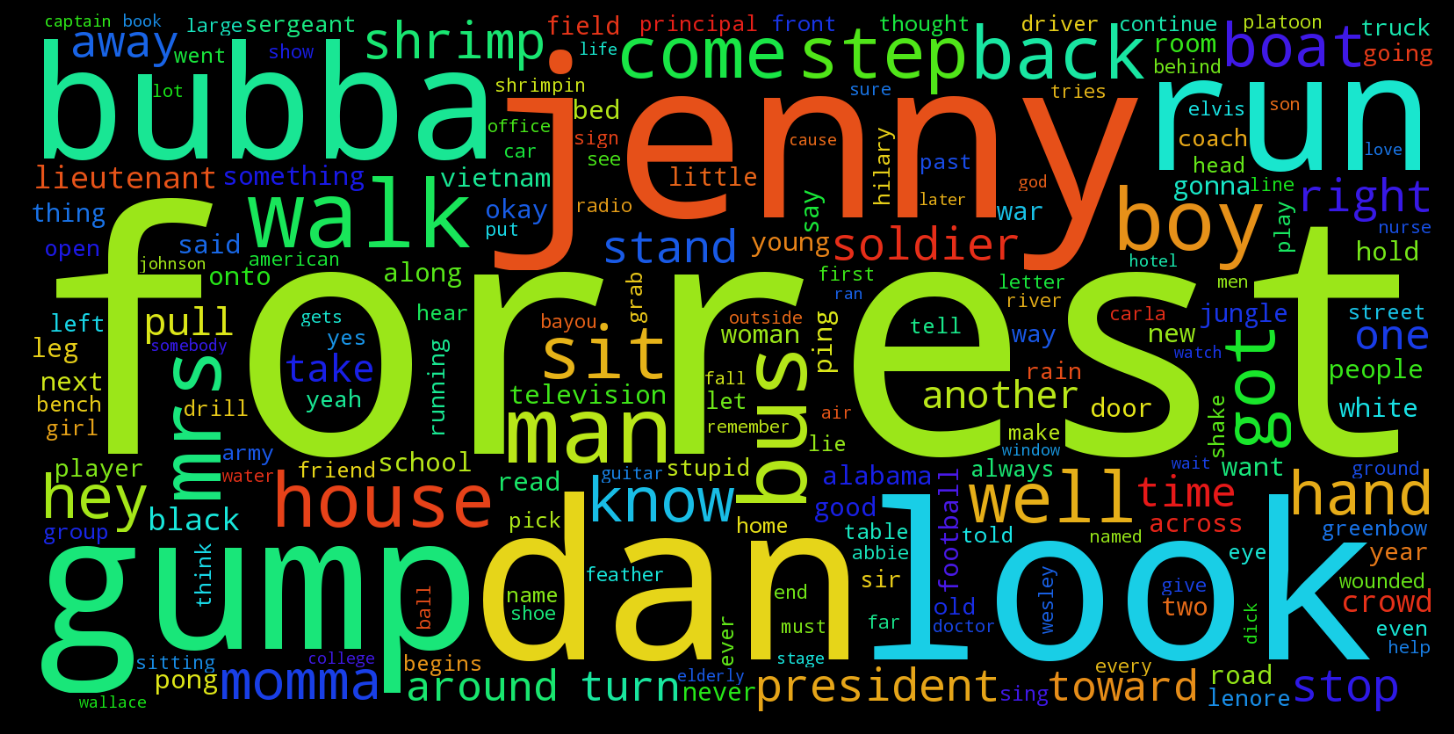

In [5]:
# Word cloud image - TEST!!!
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

token_string = ""
for i in scripts_tokens["Forrest Gump (1994)"]:
    token_string += i + " "
    
wordcloud = WordCloud(width=1600, height=800).generate(token_string)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [6]:
import csv

# Go through the data Data_Set_S1.txt and list words and their happiness average into a dictonary
word_sentiment_dic = {}
with open('./Data_Set_S1.txt', 'r') as f:
    # Skip the headers
    lines_after_3 = f.readlines()[3:]
    reader = csv.reader(lines_after_3, delimiter='\t')
    for row in reader:
        word = row[0]
        happiness_avg = row[2]
        word_sentiment_dic[word] = happiness_avg

In [7]:
def get_sentiment_values(tokens):
    tokens_happiness_avg = []
    #tokens_happiness_avg = {}
    for word in tokens:
        # Add to list if the word is found, otherwise not
        if(word in word_sentiment_dic):
            tokens_happiness_avg.append(float(word_sentiment_dic[word]))
            #tokens_happiness_avg[word] = float(word_sentiment_dic[word])
    return tokens_happiness_avg

In [8]:
import numpy as np

# Get sentiment value for each token from the scripts
movie_scripts_sentiment = {}
for movie in scripts_tokens:
    movie_scripts_sentiment[movie] = get_sentiment_values(scripts_tokens[movie])

In [9]:
# Get average sentiment value for each script
movie_scripts_sentiment_avg = {}
for movie in movie_scripts_sentiment:
    movie_scripts_sentiment_avg[movie] = np.average(movie_scripts_sentiment[movie])

In [10]:
import operator

# Top-10 negative movie scripts based on sentiment analysis
movie_scripts_sentiment_avg_sorted = sorted(movie_scripts_sentiment_avg.items(), key=operator.itemgetter(1))
for i in movie_scripts_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Army of Darkness (1992): 5.26699400564
Blade II (2002): 5.29844324667
Frozen (2013/I): 5.31234047984
Day of the Dead (2008) (V): 5.31556381549
Conan the Barbarian (2011): 5.32655623951
Three Kings (1999): 5.3339200299
Ghost Rider (2007): 5.33944053246
The Mummy (1999): 5.34128097197
Blade (1998): 5.34513518809
Predator (1987): 5.34540363636


In [11]:
# Top-10 positive movie scripts based on sentiment analysis
movie_scripts_sentiment_avg_sorted = sorted(movie_scripts_sentiment_avg.items(), key=operator.itemgetter(1), reverse=True)
for i in movie_scripts_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Midnight in Paris (2011): 5.80451202263
The Cider House Rules (1999): 5.787956836
Precious (2009/II): 5.78165980933
Sunshine Cleaning (2008): 5.78148977605
Rambling Rose (1991): 5.77563115292
Juno (2007): 5.75226058067
Clueless (1995): 5.75070360773
Sex and the City (2008): 5.75058085278
Rachel Getting Married (2008): 5.75049074593
Bridesmaids (2011/I): 5.74816418179


In [15]:
from collections import defaultdict

# Add sentiment scores to each director
movie_scripts_directors_sentiments = defaultdict(list)
for movie in scripts_tokens:
    movie_scripts_directors_sentiments[movies[movie]["director"]].append(movie_scripts_sentiment_avg[movie])

In [17]:
# Calculate the average sentiment score for each director
movie_scripts_directors_sentiment_avg = {}
for director, sentiment_scores in movie_scripts_directors_sentiments.iteritems():
    # Disclude directors who have directed 2 movies or less
    if(len(sentiment_scores) > 2):
        movie_scripts_directors_sentiment_avg[director] = np.average(sentiment_scores)

In [18]:
# Top-10 negative directors based on sentiment analysis
movie_scripts_directors_sentiment_avg_sorted = sorted(movie_scripts_directors_sentiment_avg.items(), key=operator.itemgetter(1))
for i in movie_scripts_directors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Guillermo del Toro: 5.39084505781
John McTiernan: 5.40405162236
Alex Proyas: 5.41681386698
Renny Harlin: 5.42080440154
Sam Raimi: 5.42662728082
Paul W.S. Anderson: 5.44147311829
Bryan Singer: 5.44481856784
Ron (I) Howard: 5.4678665098
Frank Darabont: 5.47309712931
Paul (I) Verhoeven: 5.47541132992


In [19]:
# Top-10 positive directors based on sentiment analysis
movie_scripts_directors_sentiment_avg_sorted = sorted(movie_scripts_directors_sentiment_avg.items(), key=operator.itemgetter(1), reverse=True)
for i in movie_scripts_directors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Woody Allen: 5.69873590367
Cameron (I) Crowe: 5.68205363261
James L. Brooks: 5.6450961454
Jonathan Demme: 5.62046628734
Paul Thomas (I) Anderson: 5.61094894808
Bennett (I) Miller: 5.59669658137
Henry Selick: 5.5866536874
Anthony Minghella: 5.58410750115
Gus Van Sant: 5.57140066547
Brett Ratner: 5.55868233584


In [20]:
actors_list = ["actor1", "actor2", "actor3", "actor4", "actor5", "actor6"]

# Add sentiment scores to each actor
movie_scripts_actors_sentiments = defaultdict(list)
for movie in scripts_tokens:
    for actor in actors_list:
        movie_scripts_actors_sentiments[movies[movie][actor]].append(movie_scripts_sentiment_avg[movie])

In [21]:
# Calculate the average sentiment score for each actor
movie_scripts_actors_sentiment_avg = {}
for actor, sentiment_scores in movies_scripts_actors_sentiments.iteritems():
    # Disclude actors who have appeared in 2 movies or less
    if(len(sentiment_scores) > 2):
        movie_scripts_actors_sentiment_avg[actor] = np.average(sentiment_scores)

NameError: name 'movies_scripts_actors_sentiments' is not defined

In [ ]:
# Top-10 negative actors based on sentiment analysis
movie_scripts_actors_sentiment_avg_sorted = sorted(movie_scripts_actors_sentiment_avg.items(), key=operator.itemgetter(1))
for i in movie_scripts_actors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

In [ ]:
# Top-10 positive actors based on sentiment analysis
movie_scripts_actors_sentiment_avg_sorted = sorted(movie_scripts_actors_sentiment_avg.items(), key=operator.itemgetter(1), reverse=True)
for i in movie_scripts_actors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

In [ ]:
# Add genre to each movie
movie_scripts_genres = defaultdict(list)
for movie in scripts_tokens:
    movie_scripts_genres[movie].append(movies[movie]["genre"])

In [ ]:
# Get list of movies for each genre
movie_scripts_genres = defaultdict(list)
for movie in scripts_tokens:
    movie_scripts_genres[movies[movie]["genre"]].append(movie)

In [ ]:
print len(movie_scripts_genres["Crime"])
print movie_scripts_genres["Crime"]

In [ ]:
from collections import Counter

# Count how often a token appears in a specific genre (tf values)
def tokens_tf_genre(tokens_genre):
    movie_scripts_genre_tokens = []
    for movie in tokens_genre:
        movie_scripts_genre_tokens += scripts_tokens[movie]

    tokens_counter = Counter(movie_scripts_genre_tokens)
    # Combine list of keys and values
    tokens_tf = zip(tokens_counter.keys(), tokens_counter.values())
    # Delete duplicates and sort
    tokens_tf_sorted = sorted(set(tokens_tf))
    return tokens_tf_sorted

In [ ]:
import math

# Calculate idf values for each word in a genre
def tokens_idf_genre(tokens_genre):
    # Get get every word in the corpus (all movies)
    total_word_list = []
    for movie in tokens_genre:
        # Delete duplicated tokens from every movie script
        total_word_list += set(scripts_tokens[movie])
        
    # Count how often a token appears in a corpus for a genre
    # (equals to how many movie scripts that token is in)
    total_word_list_count = Counter(total_word_list)
   
    # Delete duplicates and sort
    total_word_list_sorted = sorted(set(total_word_list))
    
    
    idf_values = []
    for token in total_word_list_sorted:
        # log(Total number of articles / how many documents have that token)
        idf_value = math.log(len(tokens_genre)/float(total_word_list_count[token]))
        idf_values.append(idf_value)
    
    # Combine list of keys and values
    tokens_idf = zip(total_word_list_sorted, idf_values)
    return tokens_idf

In [ ]:
# Calculate tf-idf values for each word in a genre
def tokens_tfidf_genre(tokens_tf, tokens_idf):
    # Unzip lists to get values
    tokens_tf, values_tf = zip(*tokens_tf)
    tokens_idf, values_idf = zip(*tokens_idf)
    # Multiply tf and idf values
    tokens_tfidf_values = [a*b for a, b in zip(values_tf, values_idf)]
    # Combine list of keys and values
    tokens_tfidf = zip(tokens_tf, tokens_tfidf_values)
    return tokens_tfidf

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_image(tfidf):
    wordcloud_text = ""
    for i in tfidf:
        num_of_repeats = int(round(i[1]))
        wordcloud_text += (num_of_repeats * (i[0] + " "))
    
    wordcloud = WordCloud(width=1600, height=800).generate(wordcloud_text)
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
name_of_genre_tf = tokens_tf_genre(movie_scripts_genres["Crime"])
name_of_genre_idf = tokens_idf_genre(movie_scripts_genres["Crime"])
name_of_genre_tfidf = tokens_tfidf_genre(name_of_genre_tf, name_of_genre_idf)

In [ ]:
wordcloud_image(name_of_genre_tfidf)